<a href="https://colab.research.google.com/github/Jiho-korea/DeepLearning/blob/master/%EC%98%88%EC%A0%9C2_%EB%B0%B0%EC%B9%98_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 20kB/s 
     |████████████████████████████████| 512kB 45.0MB/s 
     |████████████████████████████████| 3.8MB 40.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=5e2e814ab5e5f4fc85372db1bb578721adc809bfb00e871c81f936dfeaffa4b4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installatio

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [0]:
tf.set_random_seed(777)

In [0]:
# 데이터 확인, 분석을 위해 numpy로 불러들이는 것이 아닌 pandas 를 사용함 
xy_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/DeepLearningPrac/tensorflowPrac/tensorflowHW/예제2_의료비용.csv') # numpy 대신 pandas 를 사용해 칼럼명까지 같이 읽어들임
xy_df = xy_df.dropna(how='all', axis=0)  # 결측치 제거

In [0]:
xy_df.drop("region", axis=1, inplace=True)  # 필요없는 칼럼(지역) 제거

In [0]:
xy_df.columns = ['나이', '성별', 'BMI 지수', '부양 가족', '흡연 여부', '의료비용($)']  # 칼럼명 한글로 변경
xy_df # 데이터프레임 확인

,나이,성별,BMI 지수,부양 가족,흡연 여부,의료비용($)
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [0]:
# 레이블 인코딩
xy_df.loc[xy_df['흡연 여부'] == 'yes',['흡연 여부']] = 1
xy_df.loc[xy_df['흡연 여부'] == 'no',['흡연 여부']] = 0
xy_df.loc[xy_df['성별'] == 'male',['성별']] = 1
xy_df.loc[xy_df['성별'] == 'female',['성별']] = 0

In [0]:
#결과 확인
xy_df

,나이,성별,BMI 지수,부양 가족,흡연 여부,의료비용($)
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [0]:
# 레이블 데이터만 추출
y_data_df = xy_df.iloc[:,-1]

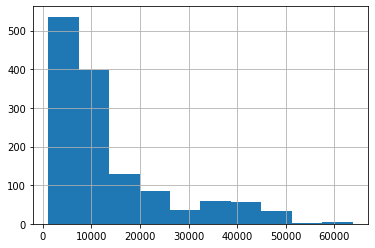

In [0]:
# 히스토그램 그리기
# 레이블 값이 많이 왜곡 되어있음
y_data_df.hist()

In [0]:
# 로그를 적용해 레이블 데이터를 정규분포형태로 변경
y_log_data_df = np.log1p(y_data_df)

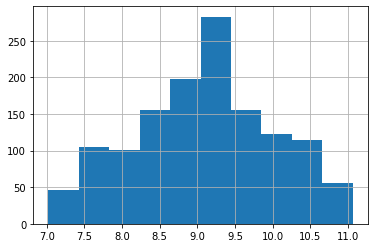

In [0]:
# 왜곡이 많이 감소하였다
y_log_data_df.hist()

In [0]:
y_data = y_log_data_df.values.reshape(-1,1)  # 정규분포된 레이블 데이터(의료비용)를 numpy로 추출
x_data = xy_df.drop("의료비용($)", axis=1).values  # 피쳐데이터를 numpy로 추출

# 넘파이 배열 내 데이터타입 변경
x_data = x_data.astype('float32')
y_data = y_data.astype('float32')

In [0]:
print(y_data.shape)
print(y_data[:7]) #레이블 확인

(1338, 1)
[[9.734236 ]
 [7.4538817]
 [8.4007635]
 [9.998137 ]
 [8.260455 ]
 [8.231542 ]
 [9.016949 ]]


In [0]:
print(x_data.shape)
print(x_data[:7,:]) # 피쳐 확인

(1338, 5)
[[19.     0.    27.9    0.     1.   ]
 [18.     1.    33.77   1.     0.   ]
 [28.     1.    33.     3.     0.   ]
 [33.     1.    22.705  0.     0.   ]
 [32.     1.    28.88   0.     0.   ]
 [31.     0.    25.74   0.     0.   ]
 [46.     0.    33.44   1.     0.   ]]


In [0]:
# 테스트세트를 분리
x_train_all, x_test, y_train_all, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=777) # 전체 데이터중 20%

In [0]:
print("학습용 ",x_train_all.shape, "\t", y_train_all.shape) # 학습용 피쳐, 레이블 데이터 
print("테스트용 ",x_test.shape, "\t", y_test.shape) # 테스트용 피쳐, 레이블 데이터

학습용  (1070, 5) 	 (1070, 1)
테스트용  (268, 5) 	 (268, 1)


In [0]:
# 텐서플로우 그래프 그리기
num_x = 5
X = tf.placeholder(tf.float32, shape=[None, num_x]) 
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random.normal([num_x , 1]), name='weight') 
b = tf.Variable(tf.random.normal([1]), name='bias')

In [0]:
hypothesis =  tf.matmul(X, W) + b

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001) 

In [0]:
train = optimizer.minimize(cost)

In [0]:
sess = tf.Session()

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
w_history = [] # 변화하는 가중치 행렬을 담기위한 리스트
cost_list = [] # 감소하는 cost를 담기위한 리스트

In [0]:
n_fold = 10 # 10개의 폴드로 나눌예정
kfold = KFold(n_splits=n_fold) 
cv_mse = [] # 폴드세트별 MSE를 저장할 리스트

In [0]:
train_fold_mean = 0
train_fold_std = 0

In [0]:
epochs = 2201
for step in range(epochs):
  fold_cost = 0
  fold_mse = 0
  for train_index, test_index in kfold.split(x_train_all):
    train_random_index = np.random.permutation(train_index)
    test_random_index = np.random.permutation(test_index)

    # 학습폴드, 검증폴드 분리(피쳐, 레이블 별)
    train_feature_fold, val_feature_fold = x_train_all[train_random_index], x_train_all[test_random_index]
    train_label_fold, val_label_fold = y_train_all[train_random_index], y_train_all[test_random_index]

    # 학습폴드를 기준으로 표준화해야한다.
    train_fold_mean = np.mean(train_feature_fold, axis=0) # 학습폴드의 각피쳐의 평균
    train_fold_std = np.std(train_feature_fold, axis=0) # 학습폴드의 각피쳐의 표준편차
    
    # 학습폴드를 기준으로 학습폴드, 검증폴드를 표준화
    train_feature_fold_scaled = (train_feature_fold - train_fold_mean) / train_fold_std
    val_feature_fold_scaled = (val_feature_fold - train_fold_mean) / train_fold_std

    # 학습폴드로 학습 
    cost_val, hy_val, W_all, _ = sess.run([cost, hypothesis, W, train], feed_dict={X:train_feature_fold_scaled, Y:train_label_fold})
    fold_cost += cost_val
    w_history.append(W_all.copy())  

    # 폴드세트별 MSE 저장 
    prediction = sess.run(hypothesis, feed_dict={X:val_feature_fold_scaled})  # 검증 세트에 대한 예측값 구하기
    fold_mse += np.mean(np.square(np.expm1(prediction) - np.expm1(val_label_fold)))
  
  cv_mse.append(fold_mse/n_fold) # epoch 별 검증폴드의 평균 MSE를 저장한다
  cost_list.append(fold_cost/n_fold) # epoch 별 학습폴드의 평균 cost를 저장한다

  if step % 200 == 0:
    print("step=",step," cost=", fold_cost/n_fold, "val_cost=",fold_mse/n_fold)
  

step= 0  cost= 77.68825607299804 val_cost= 316449568.0
step= 200  cost= 35.092952728271484 val_cost= 315164486.4
step= 400  cost= 15.917670917510986 val_cost= 307949633.6
step= 600  cost= 7.2830768585205075 val_cost= 285466001.6
step= 800  cost= 3.3938108682632446 val_cost= 242646051.2
step= 1000  cost= 1.6414730310440064 val_cost= 187935504.0
step= 1200  cost= 0.8516483545303345 val_cost= 137010255.2
step= 1400  cost= 0.49556965827941896 val_cost= 100126917.2
step= 1600  cost= 0.33496939539909365 val_cost= 78412706.0
step= 1800  cost= 0.2625216364860535 val_cost= 67924952.0
step= 2000  cost= 0.22981704622507096 val_cost= 64044808.8
step= 2200  cost= 0.215050408244133 val_cost= 63409876.8


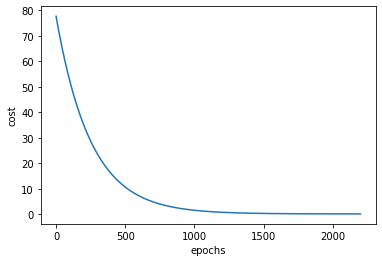

In [0]:
plt.plot(cost_list)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

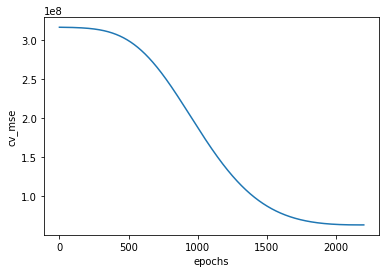

In [0]:
plt.plot(cv_mse)
plt.xlabel("epochs")
plt.ylabel("cv_mse")
plt.show()

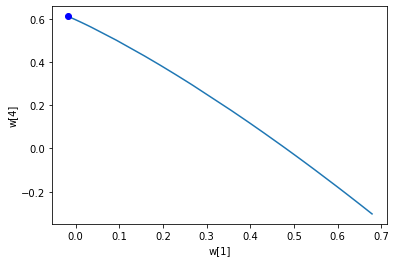

In [0]:
# 가중치 업데이트 과정 그래프 (성별, 흡연여부)
w1 = []
w4 = []
for w in  w_history:
  w1.append(w[1])
  w4.append(w[4])
plt.plot(w1, w4)
plt.plot(w1[-1], w4[-1],'bo')
plt.xlabel('w[1]')
plt.ylabel('w[4]')
plt.show()

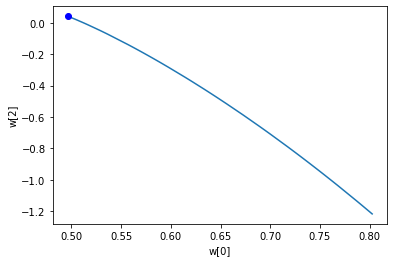

In [0]:
# 가중치 업데이트 과정 그래프 (나이, BMI)
w0 = []
w2 = []
for w in  w_history:
  w0.append(w[0])
  w2.append(w[2])
plt.plot(w0, w2)
plt.plot(w0[-1], w2[-1],'bo')
plt.xlabel('w[0]')
plt.ylabel('w[2]')
plt.show()

In [0]:
# 표준화를 쉽게 하기 위해 함수정의 -> 같은 비율로 전처리 하기 위해 학습폴드의 평균, 표준편차를 그대로 사용한다.
def standardScaler(data):
  data_scaled = (data - train_fold_mean) / train_fold_std
  return data_scaled

In [0]:
# 내가 정한 임의의 값으로 예측하기 -> 표준화한 데이터로 모델을 만들었기 때문에 임의의 값을 넣어줄때도 임의의 값을 표준화 해주어야 합니다.
X_test = np.array([[23,0,23.2,0,0]])
print(X_test)
X_test_scaled = standardScaler(X_test)
print(X_test_scaled)

[[23.   0.  23.2  0.   0. ]]
[[-1.14465123 -1.00729454 -1.21231039 -0.93370415 -0.49902727]]


In [0]:
print(np.expm1(sess.run(hypothesis, feed_dict={X:X_test_scaled})))  # 예측한 값은 expm1 함수를 사용해 원래의 scale로 되돌려야함

[[2911.6567]]


In [0]:
# 임의의 샘플데이터 5개로 예측값 구해보기
X_test_5 = np.array([[23,0,23.2,0,0],  
                     [19,1,27.9,0,1],   
                     [28,1,33,3,0],   
                     [33,1,22.705,0,1], 
                     [32,1,28.88,0,0]]) 

X_test_5_scaled = standardScaler(X_test_5)

In [0]:
print(np.expm1(sess.run(hypothesis, feed_dict={X:X_test_5_scaled})))

[[ 2911.6567]
 [11629.656 ]
 [ 4757.    ]
 [18502.744 ]
 [ 4020.9663]]


In [0]:
try:
  x_input = input("입력(나이, 성별, BMI, 부양가족수, 흡연여부): ")
  if x_input == 'x':
    raise NotImplementedError
  x_input_strip =[ float(i.strip()) for i in x_input.split(",")]
  print("나이\t성별\tBMI\t가족수\t흡연여부")
  for i in x_input_strip:
    print(i,end="\t")
  print()
  x_input_test = np.array([x_input_strip]).astype('float32')

  x_input_test_scaled = standardScaler(x_input_test)

  print("예상 의료비용 : ",np.expm1(sess.run(hypothesis, feed_dict={X:x_input_test_scaled}))) 
  
except ValueError:
  print("입력을 다시 확인해주세요")
except NotImplementedError:
  print("종료")


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 729, in _input_request
    ident, reply = self.session.recv(self.stdin_socket, 0)
  File "/usr/local/lib/python3.6/dist-packages/jupyter_client/session.py", line 803, in recv
    msg_list = socket.recv_multipart(mode, copy=copy)
  File "/usr/local/lib/python3.6/dist-packages/zmq/sugar/socket.py", line 475, in recv_multipart
    parts = [self.recv(flags, copy=copy, track=track)]
  File "zmq/backend/cython/socket.pyx", line 791, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 827, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 186, in zmq.backend.cython.socket._recv_copy
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/li

TypeError: ignored

In [0]:
sess.close()